# Analyzing grain distributions with the GrainDistribution class

## Initializing a GrainDistribution

Although pyfluv is intended primarily to handle morphological data, many restoration projects involve tracking and analyzing the size distribution of substrate sediment. The `GrainDistribution` class is intended to do just this. Like `Profile` and `CrossSection` objects, `GrainDistribution` objects accept data in both imperial and metric units, though the units are inches and millimeters rather than feet and meters. `GrainDistribution` accepts either a list or dictionary as a representation of the distribution. If a list is passed, then each entry represents a single pebble/grain. If a dictionary is passed, each key represents a size and the paired value is the number of grains of that size present in the survey. Thus, `[1,1,3,3,3,4]` and `{1:2,3:3,4:1}` are equivalent.

In [51]:
import pyfluv

surveyDistr = [1,3,2,4,2,3,5,6,4,6,9,10,12,12,1,0.2,0.3,0.2,.04,3,'Bedrock','Bedrock']
# 'Bedrock' will be converted to the largest size class (1024mm)
myDist = pyfluv.GrainDistribution(distr=surveyDistr, name='myDist', metric=True)

myDist.distr

{0.04: 1,
 0.2: 2,
 0.3: 1,
 1: 2,
 2: 2,
 3: 3,
 4: 2,
 5: 1,
 6: 2,
 9: 1,
 10: 1,
 12: 2,
 1024: 2}

As you can see, `GrainDistribution` coerces the distribution to a dictionary if it isn't already (and sorts it by size). If you want to get the distribution back as a list, you can call the `make_countlist()` method.

In [52]:
myDist.make_countlist()

[0.04,
 0.2,
 0.2,
 0.3,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 5,
 6,
 6,
 9,
 10,
 12,
 12,
 1024,
 1024]

## Visualization

Pyfluv comes packaged with pebble counts from the West Piney mitigation project. However, there is no standardized way to read in grain distribution data, unlike how `StreamSurvey` parses surveys and creates `Profile` and `CrossSection` objects. Generally it is relatively straightforward to read in a csv and pass the data yourself to `GrainDistribution`. If you are interested in seeing how the West Piney pebble count data is formatted you can view it [here](https://github.com/rsjones94/pyfluv/blob/master/pyfluv/Data/wpr_myr5_pebbles.csv).

In [53]:
pCounts = pyfluv.piney_pebbles()

The `piney_pebbles()` function returns a list of instances of `GrainDistribution`. The `sizeplot()` method is a quick way to visualize a pebble count. By default it normalizes the data and creates a cumulative semilog plot, though these parameters can be changed.

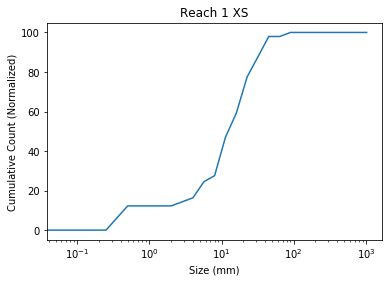

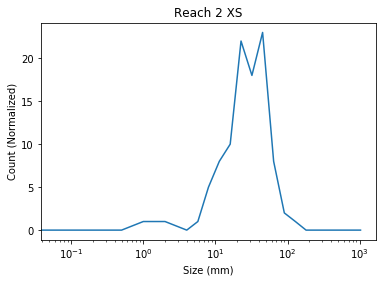

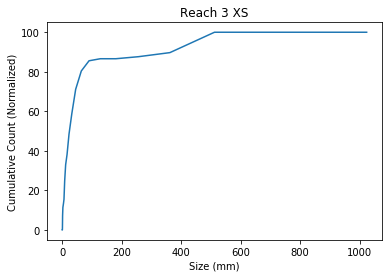

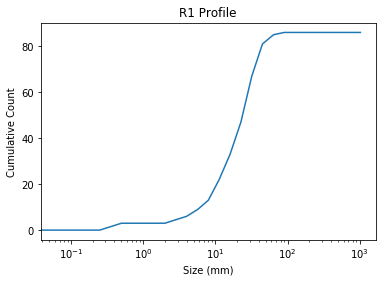

In [54]:
import matplotlib.pyplot as plt

plt.figure()
pCounts[0].sizeplot()
plt.figure()
pCounts[1].sizeplot(cumulative=False)
plt.figure()
pCounts[2].sizeplot(semilog=False)
plt.figure()
pCounts[5].sizeplot(normalize=False)

These plots will have a an x-axis range that extends from the smallest key in `distr` to the largest. Because of the way the distribution dictionaries were created for these instances of `GrainDistirbution`, the range is always from 0 to 1024mm. You can alter the range of the axis by passing a distribution dictionary with keys that cover the only the range you're interested in.

A `bplot` (bar plot) method is also included. The size classes are based on ISO 14688-1:2002 grain size classification standards. If you're interested in what these sizes are, you can call the `bin_particles()` method, which returns a dictionary where the keys and size descriptions and the values are a list where the first entry is the lower bound on the class and the second is the number of particles in your distribution in that class. Bar plots show every size class even if there are no particles in it.

{'C': [0, 0],
 'FM': [0.002, 0],
 'MM': [0.0063, 0],
 'CM': [0.02, 0],
 'FS': [0.063, 0],
 'MS': [0.2, 0],
 'CS': [0.63, 0],
 'FG': [2, 3],
 'MG': [6.3, 28],
 'CG': [20, 62],
 'Cob': [63, 7],
 'Bol': [200, 0],
 'LBol': [630, 0]}

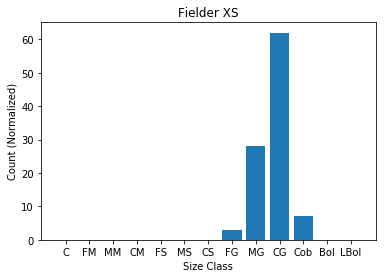

In [55]:
pCounts[4].bplot(normalize=True)
#clay, fine silt, medium silt, coarse silt, fine sand, medium sand, coarse sand, fine gravel, medium gravel, coarse gravel
#cobble, boulders, large boulders
pCounts[4].bin_particles()

## Statistics

In [56]:
print(f'Sorting coefficient is {pCounts[1].sorting()}')
print(f'Skewness is {pCounts[1].skewness()}')
print(f'Kurtosis is {pCounts[1].kurtosis()}')
print(f'Standard deviation is is {pCounts[1].stddev()}')
print(f'Mean grain size is {pCounts[1].mean()}')
print(f'Median grain size is {pCounts[1].median()}') # this is the d50
print(f'd50 is is {pCounts[1].dx(50)}')
print(f'd84 is is {pCounts[1].dx(84)}')

Sorting coefficient is -0.9540846089581351
Skewness is -0.14146243332273675
Kurtosis is 1.0318600208048563
Standard deviation is is 15.436956521739129
Mean grain size is 22.41904723366232
Median grain size is 23.644444444444446
d50 is is 23.644444444444446
d84 is is 42.17391304347826


If you need to use $\phi$ notation for something, then you might find the `phi_to_num()` and `num_to_phi()` methods useful. These methods are unit aware, so they will take into account the value of `metric` of the instance you call the method from.

In [57]:
print(f'8mm in phi is {pCounts[0].num_to_phi(8)}')
print(f'-3 phi in mm is {pCounts[0].phi_to_num(-3)}')

pCounts[0].metric = False

print(f'8 inches in phi is {pCounts[0].num_to_phi(8)}')
print(f'-3 phi in inches is {pCounts[0].phi_to_num(-3)}')

8mm in phi is -3.0
-3 phi in mm is 8
8 inches in phi is -7.666756591884804
-3 phi in inches is 0.31496062992125984
